In [1]:
import json
import os
import sys
from collections import Counter, defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm 

src_dir = os.path.abspath(os.path.join(os.pardir, os.pardir,'src'))
sys.path[0] = src_dir
print(sys.path[0])
from parser.support import ROLES, CREDITS
from parser.my_mongo_db_login import DB_LOGIN_INFO
import parser.support as support
import network.shift_graph_maker as sgm
import model.contagion as contagion
import parser.reader as read

/home/staff/junelee/Research-Project/movie_propagation_reserve/src


In [2]:
%reload_ext autoreload
%autoreload 2
%load_ext snakeviz

%matplotlib inline

### plot for sir

In [3]:
from os import listdir
from os.path import isfile, join
import re

In [4]:
#read file
result_dir = '/home/projects/movie-network/result/contagion/temporal/real/'
file_list = [join(result_dir, f) for f in listdir(result_dir) if isfile(join(result_dir, f))]

In [5]:
producer_file = '/home/projects/movie-network/data/raw_data/movies.json'
with open(producer_file) as f:
    movie_file = f.read()
    movie_data = json.loads(movie_file)
role = 'producing'
role_key = role+'_gender_percentage'
all_movies = support.get_movies_df(role_key)
movie_period = all_movies[(all_movies.year >= 1990) & (all_movies.year < 2000)]
producer_series = movie_period.producers.tolist()
all_producers = list(set([i[0] for sublist in producer_series for i in sublist]))
N = len(all_producers)

Loaded IMDb movies producing_gender_percentage


In [6]:
projected_folder = '/home/projects/movie-network/result/mean/projected/sequential/'
synthetic_folder = '/home/projects/movie-network/result/mean/synthetic/'
real_folder = '/home/projects/movie-network/result/mean/real/'

In [7]:
next(os.walk(synthetic_folder))

('/home/projects/movie-network/result/mean/synthetic/',
 ['model_1_1', 'model_1_0', 'model_2_1_random_seeds', 'model_2_0'],
 [])

In [8]:
def get_parameters(file_names):
    """
    get list of parameters from the file
    """
    param_list = []
    for path in file_names:
        f_name = os.path.basename(path)
        p = re.compile(r'p[0-9]+\_d[0-9]+\_t[0-9]+')
        param = p.search(f_name).group()
        param_list.append(param)
    param_list = list(set(param_list))
    return param_list

In [9]:
model_2_0_folder = '/home/projects/movie-network/result/mean/synthetic/model_2_0/'
real_file_list = [join(real_folder, f) for f in listdir(real_folder) if isfile(join(real_folder, f))]
param_file_list = [join(model_2_0_folder, f) for f in listdir(model_2_0_folder) if isfile(join(model_2_0_folder, f))]

In [10]:
param_list = get_parameters(param_file_list)
param = param_list[1]
param

'p70_d100_t100'

In [11]:
param_list

['p30_d100_t100',
 'p70_d100_t100',
 'p10_d100_t100',
 'p50_d100_t100',
 'p90_d100_t100']

In [12]:
def plot_contagion(df, ax, label, color):
    m = df['mean']
    lc = df['low_ci']
    hc = df['high_ci']
    
    ax.fill_between(df.index, lc, hc, alpha=0.2, color=color)
    ax.plot(df.index, m, color=color, label=label)
    return ax

model_1_1
model_1_0
model_2_1_random_seeds
model_2_0
unweighted_agg_1
unweighted_agg_2
model_1_1
model_1_0
model_2_1_random_seeds
model_2_0
unweighted_agg_1
unweighted_agg_2
model_1_1
model_1_0
model_2_1_random_seeds
model_2_0
unweighted_agg_1
unweighted_agg_2
model_1_1
model_1_0
model_2_1_random_seeds
model_2_0
unweighted_agg_1
unweighted_agg_2
model_1_1
model_1_0
model_2_1_random_seeds
model_2_0
unweighted_agg_1
unweighted_agg_2


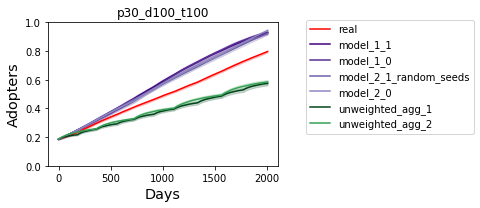

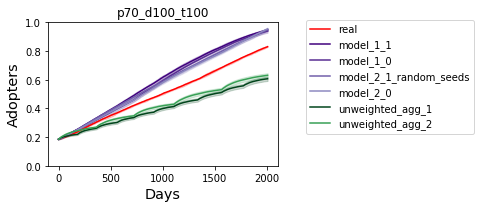

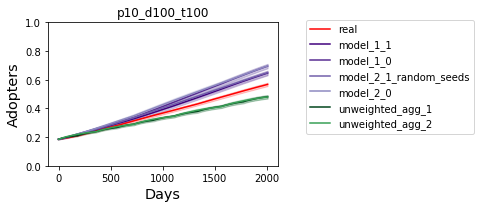

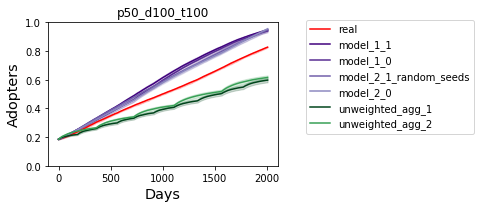

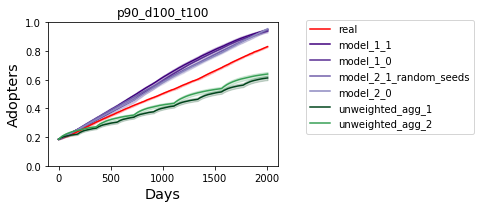

In [20]:
fontsize=12
for param in param_list:
    fig, ax = plt.subplots(figsize=(7,3))
    synthetic_sub_dir = next(os.walk(synthetic_folder))[1]
    syn_color = iter(cm.Purples_r(np.linspace(0,1, 2*len(synthetic_sub_dir))))
    projected_sub_dir = next(os.walk(projected_folder))[1]
    pro_color = iter(cm.Greens_r(np.linspace(0, 1, 2*len(projected_sub_dir))))
    
    real_df = read.read_mean_files_w_parameter(real_folder, param)
    ax = plot_contagion(real_df, ax, 'real', 'red')
    
    for sub_dir in synthetic_sub_dir:
        print(sub_dir)
        path = os.path.join(synthetic_folder, sub_dir)
        df = read.read_mean_files_w_parameter(path, param)
        c = next(syn_color)
        ax = plot_contagion(df, ax, sub_dir, c)
    for sub_dir in projected_sub_dir:
        print(sub_dir)
        path = os.path.join(projected_folder, sub_dir)
        df = read.read_mean_files_w_parameter(path, param)
        c = next(pro_color)
        ax = plot_contagion(df, ax, sub_dir, c)
    #figure style
    ax.set_ylim([0,1])
    ax.legend(loc='best', prop={'size':0.8*fontsize})
    ax.set_xlabel('Days', fontsize=1.2*fontsize)
    ax.set_ylabel('Adopters', fontsize=1.2*fontsize)
    ax.legend(bbox_to_anchor=(1.1, 1.05))
    ax.set_title(param)
    
    plt.tight_layout()
    plt.savefig('../../temp_result/{}.pdf'.format(param), transparent=True, dpi=300)

In [14]:
fname1 = '/home/projects/movie-network/result/contagion/temporal/synthetic/model_2_1_random_seeds/contagion_1_p10_d100_t100_ver_125428_1.json'

In [15]:
fname2 = '/home/projects/movie-network/result/contagion/temporal/synthetic/model_2_0/contagion_1_p10_d100_t100_ver_125621_0.json'

In [16]:
df1 = pd.read_json(fname1, orient='split')
df2 = pd.read_json(fname2, orient='split')

In [17]:
df1 = df1.drop(['year'], axis=1)
dist1 = df1.iloc[-1].tolist()
df2 = df2.drop(['year'], axis=1)
dist2 = df2.iloc[-1].tolist()

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

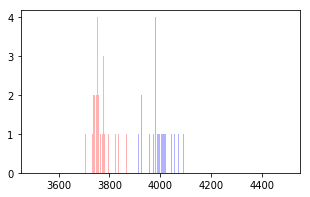

In [18]:
fig, ax = plt.subplots(figsize=(5,3))

bins=np.arange(3500, 4500, 1)
ax.hist(dist1, color='red', bins=bins, alpha=0.3)
ax.hist(dist2, color='blue', bins=bins, alpha=0.3)


In [19]:
mean1 = np.mean(dist1)
std1 = np.std(dist1)

mean2 = np.mean(dist2)
std2 = np.std(dist2)


In [33]:
mean1/5758, mean2/5758


(0.653782563390066, 0.6944980896144495)

In [34]:
std1/5758, std2/5758

(0.00668147492640963, 0.0072523851527343565)